In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['figure.dpi'] = 150

import matplotlib.pyplot as plt
matplotlib.rcParams.update({'figure.autolayout': True})

import seaborn as sns
sns.set(style='whitegrid', font_scale=0.9, rc={"lines.linewidth": 1.4,
                                           'lines.markersize': 1.6}, font="serif")

# import jtplot module in notebook
#from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
#jtplot.style(theme='oceans16')

# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
#jtplot.style(context='notebook', fscale=1, spines=False, gridlines='--')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size

In [3]:
import numpy as np
from maszcal.data.sims import NBatta2010

In [4]:
DATA_DIR = '../data/NBatta2010/single-mass-bin-fits/'

In [5]:
nbatta_sims = NBatta2010('../data/NBatta2010/')

In [6]:
zs = nbatta_sims.redshifts
rs = nbatta_sims.radii
wl_signals = nbatta_sims.wl_signals

z_colors = ['#e25f5e', '#e16435', '#cb8149', '#e09f2c', '#c2a850', '#bac84b', '#73983e',
            '#67c350', '#5ec681', '#44caaf', '#38b3eb', '#4c95dd', '#2c87f7', '#688cdc']

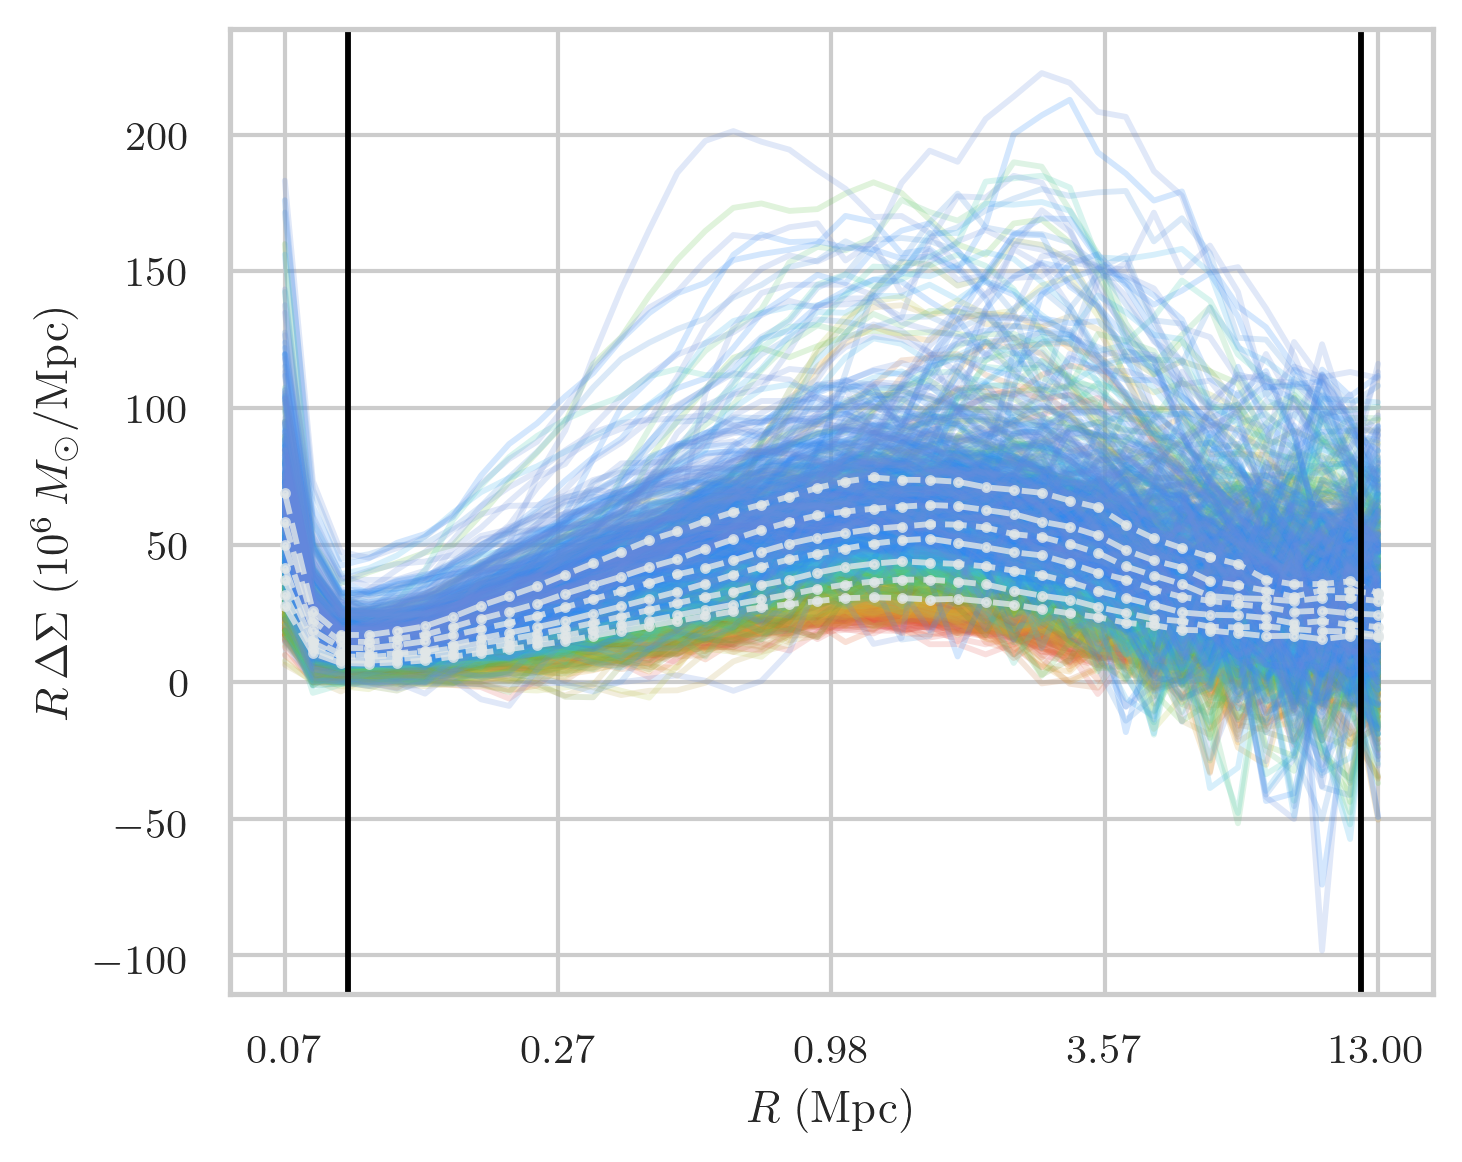

In [16]:
LOWER_BOUND = 0.1
UPPER_BOUND = 12
for i, z in enumerate(zs):
    plt.plot(rs, rs[:, None]*wl_signals[:, i, :], color=z_colors[i], alpha=0.2)

for i in range(0, zs.size, 2):
    plt.plot(rs, (rs[:, None]*wl_signals[:, i, :]).mean(axis=1),
             color='#e1e7e8', alpha=0.8, linestyle='--', marker='o')
    
plt.xscale('log')
plt.xticks(np.logspace(np.log10(rs[0]), np.log10(rs[-1]), 5))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.2f}')) # 2 decimal places

plt.xlabel(r'$R \; (\mathrm{Mpc})$')
plt.ylabel(r'$R \, \Delta \Sigma$ ($10^6 \, M_\odot/\mathrm{Mpc}$)')

plt.axvline(x=LOWER_BOUND, color='black')
plt.axvline(x=UPPER_BOUND, color='black')

plt.gcf().set_size_inches(5, 4)

#plt.savefig('misc/a-exam_sim_data_full.pdf', bbox_inches='tight')
pass

In [17]:
rs[(LOWER_BOUND < rs) & (rs < UPPER_BOUND)].size

36

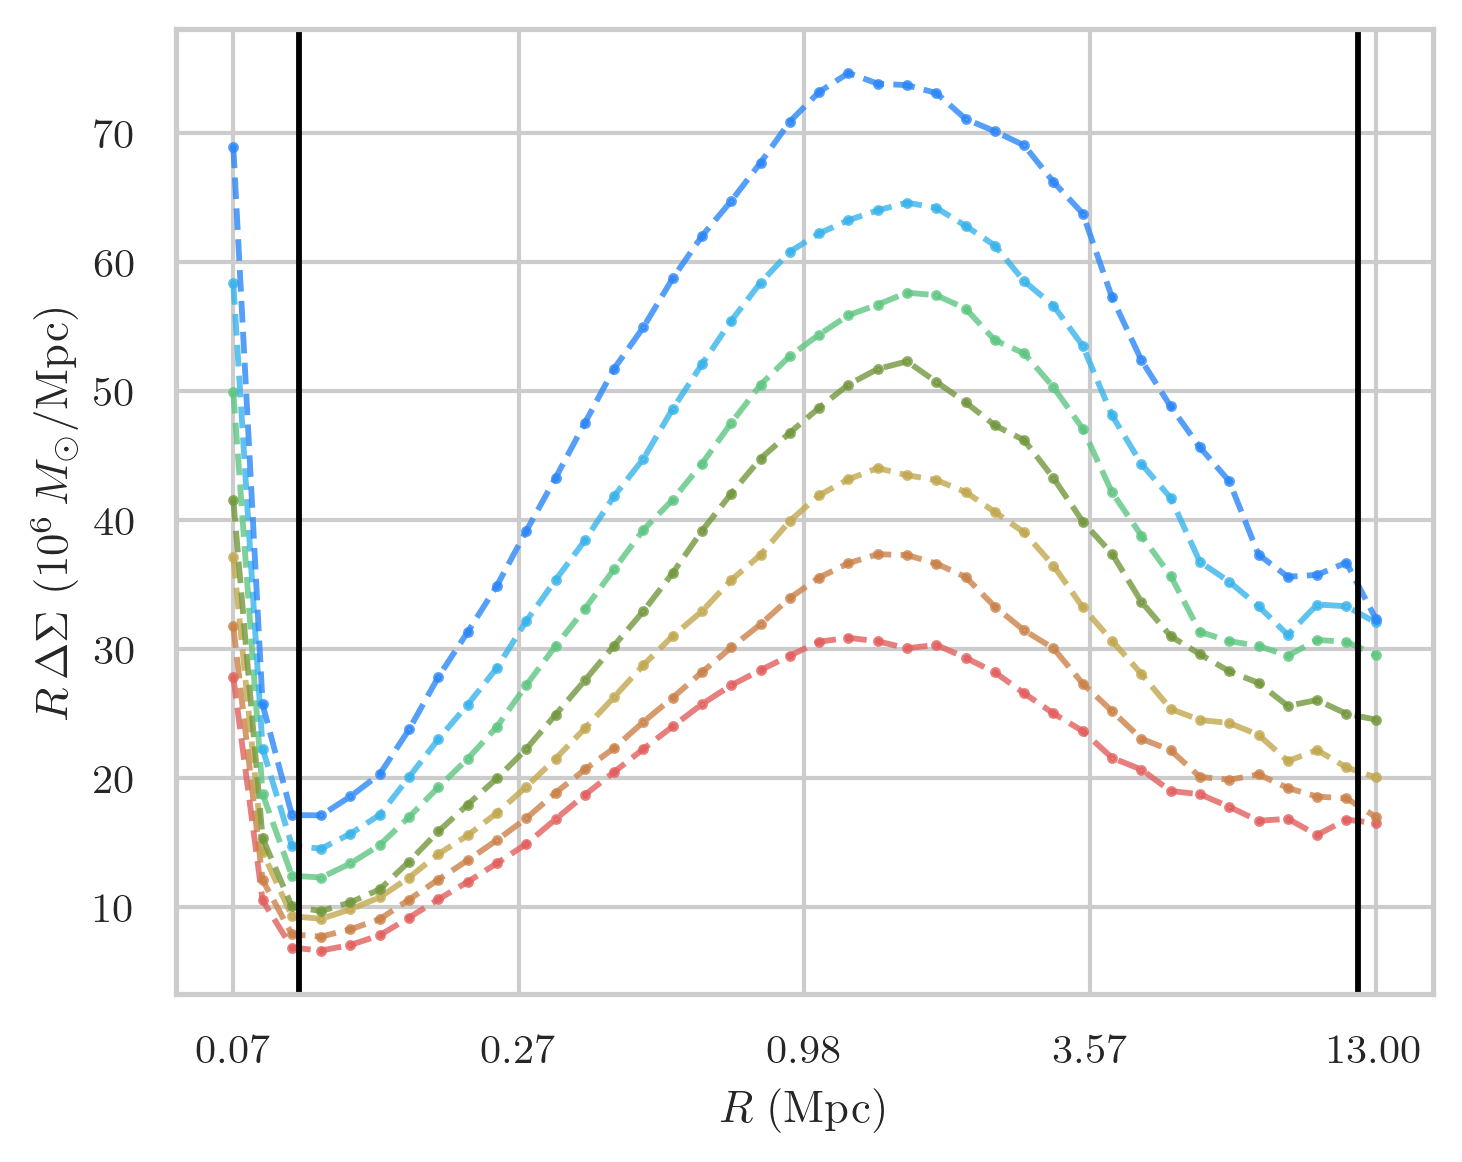

In [18]:
for i in range(0, zs.size, 2):
    plt.plot(rs, (rs[:, None]*wl_signals[:, i, :]).mean(axis=1),
             color=z_colors[i], alpha=0.8, linestyle='--', marker='o')
    
plt.xscale('log')
plt.xticks(np.logspace(np.log10(rs[0]), np.log10(rs[-1]), 5))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.2f}')) # 2 decimal places

plt.xlabel(r'$R \; (\mathrm{Mpc})$')
plt.ylabel(r'$R \, \Delta \Sigma$ ($10^6 \, M_\odot/\mathrm{Mpc}$)')

plt.axvline(x=LOWER_BOUND, color='black')
plt.axvline(x=UPPER_BOUND, color='black')

plt.gcf().set_size_inches(5, 4)

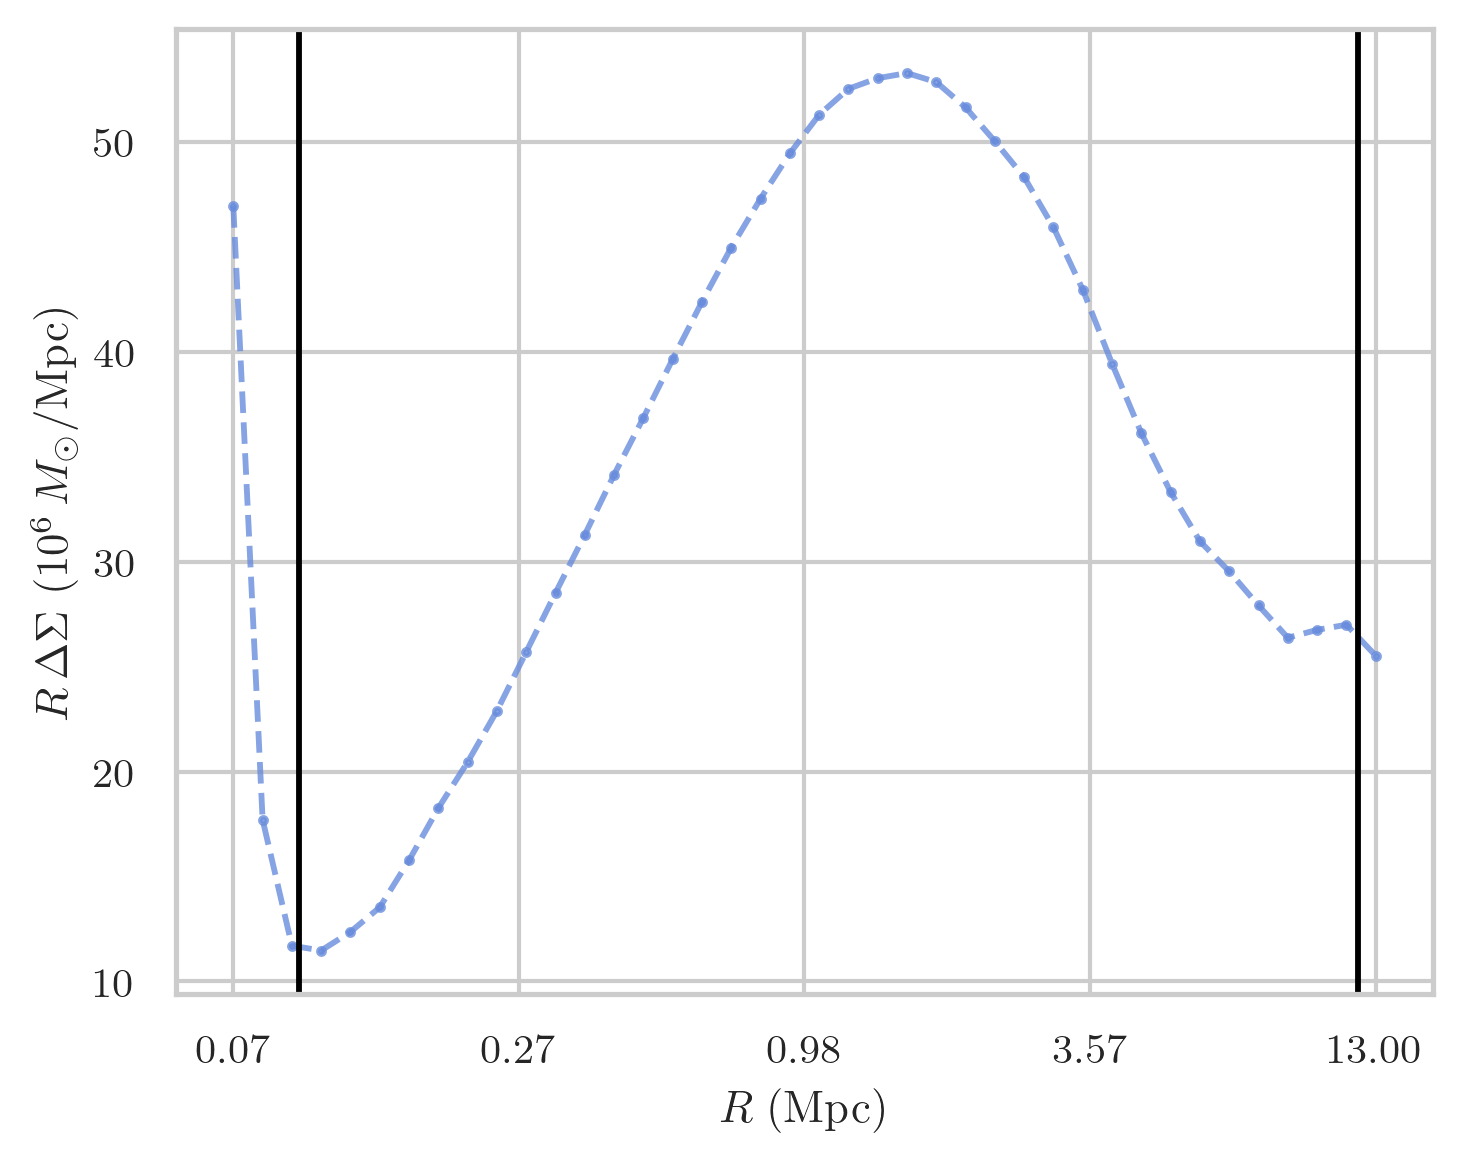

In [19]:
plt.plot(rs, rs*wl_signals.mean(axis=(1, 2)), color=z_colors[-1], alpha=0.8, linestyle='--', marker='o')
    
plt.xscale('log')
plt.xticks(np.logspace(np.log10(rs[0]), np.log10(rs[-1]), 5))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.2f}')) # 2 decimal places

plt.xlabel(r'$R \; (\mathrm{Mpc})$')
plt.ylabel(r'$R \, \Delta \Sigma$ ($10^6 \, M_\odot/\mathrm{Mpc}$)')

plt.axvline(x=LOWER_BOUND, color='black')
plt.axvline(x=UPPER_BOUND, color='black')

plt.gcf().set_size_inches(5, 4)

In [20]:
mass_sorted_indices = nbatta_sims.masses.argsort(axis=1)

In [21]:
zs = nbatta_sims.redshifts
sorted_masses = np.array([nbatta_sims.masses[i, mass_sorted_indices[i]] for i in range(zs.size)])

In [22]:
assert np.all(np.isin(sorted_masses, nbatta_sims.masses))
assert np.all(np.isin(nbatta_sims.masses, sorted_masses))

In [23]:
sorted_wls = np.moveaxis(
    np.array([nbatta_sims.wl_signals[:, i, mass_sorted_indices[i]] for i in range(zs.size)]),
    0,
    1,
)

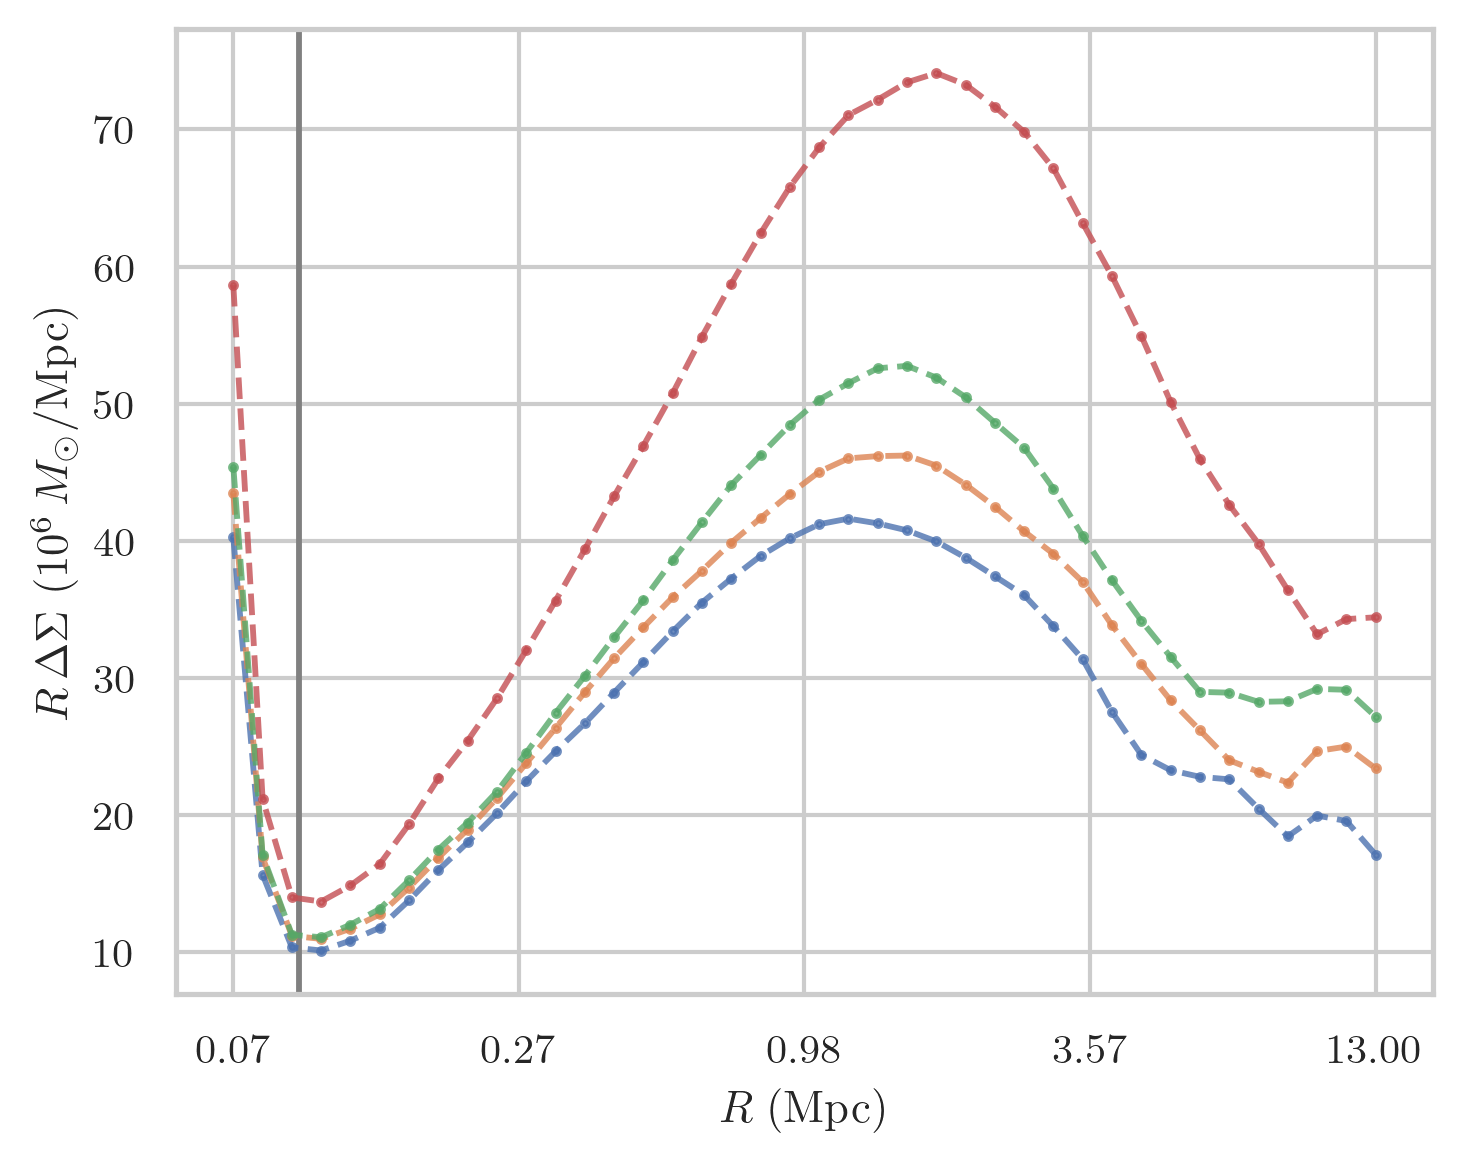

In [24]:
plt.axvline(x=LOWER_BOUND, color='grey')
#plt.axvline(x=UPPER_BOUND, color='black')
#plt.plot(rs, rs*sorted_wls.mean(axis=(1, 2)), alpha=0.8, linestyle='-', marker='o')

num_masses = sorted_masses.shape[1]
num_mass_bins = 4
mass_bin_size = num_masses//num_mass_bins

for i in range(num_mass_bins):
    lower_idx = i*mass_bin_size
    upper_idx = (i+1) * mass_bin_size
    plt.plot(rs, rs*sorted_wls[:, :, lower_idx:upper_idx].mean(axis=(1, 2)),
             alpha=0.8, linestyle='--', marker='o')
    
plt.xscale('log')
plt.xticks(np.logspace(np.log10(rs[0]), np.log10(rs[-1]), 5))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.2f}')) # 2 decimal places

plt.xlabel(r'$R \; (\mathrm{Mpc})$')
plt.ylabel(r'$R \, \Delta \Sigma$ ($10^6 \, M_\odot/\mathrm{Mpc}$)')


plt.gcf().set_size_inches(5, 4)